In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

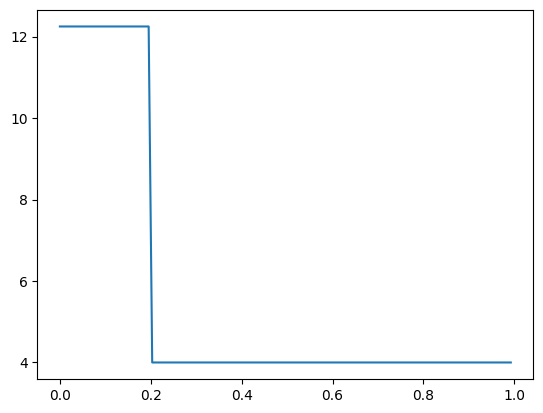

In [17]:
n = 128 # number of sampling points of a single unit cell
M = 50 # times the cell is repeated through all space
N = M*n # total number of sampling points
a0 = 1. # lattice constant
a = a0*M # lattice constant of the cristal
dx = a/N # space increment
er2=4
er1=12.25
da=0.8
nx=100
x_cell = np.arange(0, a0, dx) # sampling points in the unit cell
kx= np.linspace(-np.pi/a,np.pi/a,nx+1)

def y(x): #Dielectric function
    s=np.zeros(len(x))
    for i in range(len(x)):
        if x[i]<(a0-da):
            s[i]=er1
        else:
            s[i]=er2
            
    return np.array(s)



x_cell = np.arange(0, a0, dx) # sampling points in the unit cell
e_cell = y(x_cell)
plt.figure()
plt.plot(x_cell, e_cell)
plt.show()

# Generalized FDFD Method In $S^1$

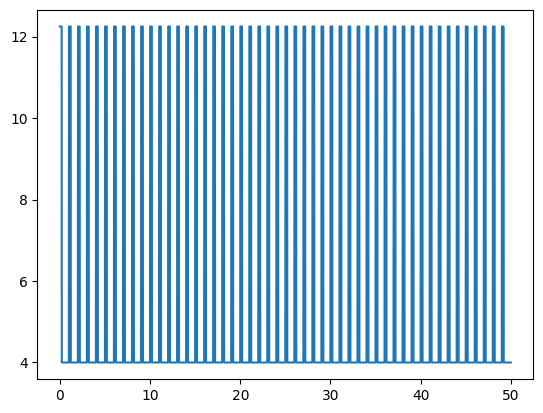

In [20]:
x = np.arange(0, a, dx)
e = np.array(list(e_cell)*M)
plt.figure()
plt.plot(x, e)
plt.show()

In [21]:
D0 = np.diag([-2]*N, 0) + np.diag([1]*(N-1), -1) + np.diag([1]*(N-1), 1)
D0[0,-1] = 1.; D0[-1,0]= 1.
D0 = D0.astype("float")
D0 = D0 @ np.diag(e**-1) * dx**-2
print(D0)

[[-2674.93877551  1337.46938776     0.         ...     0.
      0.          4096.        ]
 [ 1337.46938776 -2674.93877551  1337.46938776 ...     0.
      0.             0.        ]
 [    0.          1337.46938776 -2674.93877551 ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ... -8192.
   4096.             0.        ]
 [    0.             0.             0.         ...  4096.
  -8192.          4096.        ]
 [ 1337.46938776     0.             0.         ...     0.
   4096.         -8192.        ]]


In [22]:
B0 = np.zeros((N,n), dtype='complex')
k = np.pi*a0

for m in range(M):
    B0[m*n:(m+1)*n] = np.identity(n)

print(np.real(B0))

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [23]:
Nk = 25 # Numero de puntos del vector de onda
b = np.pi/a0 # Espacio reciproco.
BZ = np.linspace(-b,b,Nk)
#BZ = [0]
band_structure = []
eigenmodes = []

for k in BZ:
    print(k)
    
    B = np.copy(B0)
    for m in range(M):
        B[m*n:(m+1)*n] *= np.exp(1j*k*a0*m)
        
    Binv = np.linalg.pinv(B) 
    D = np.copy(D0).astype("complex")
    D[0,-1] *= np.exp(-1j*M*k*a0); D[-1, 0] *= np.exp(1j*M*k*a0)
    D = Binv @ D @ B
    
    #eigenfreqs, eigenvecs = eigs(A, which='SR', k = N0)
    eigenfreqs, eigenvecs = np.linalg.eig(D)
    eigenfreqs = np.sqrt(np.abs(np.real(eigenfreqs)))
    inds = eigenfreqs.argsort()
    eigenvecs = eigenvecs[inds]
    eigenfreqs.sort()
    band_structure.append(eigenfreqs)
    eigenmodes.append(eigenvecs)
    
GFDFD_band_structure = np.array(band_structure)[:,:5] # keep the first 5 modes
GFDFD_eigenmodes = np.array(eigenmodes)[:,:5] # keep the first 5 modes

-3.141592653589793
-2.8797932657906435
-2.6179938779914944
-2.356194490192345
-2.0943951023931957
-1.8325957145940461
-1.5707963267948966
-1.3089969389957472
-1.0471975511965979
-0.7853981633974483
-0.5235987755982991
-0.2617993877991496
0.0
0.26179938779914913
0.5235987755982987
0.7853981633974478
1.0471975511965974
1.3089969389957465
1.5707963267948966
1.8325957145940457
2.094395102393195
2.356194490192345
2.617993877991494
2.879793265790643
3.141592653589793


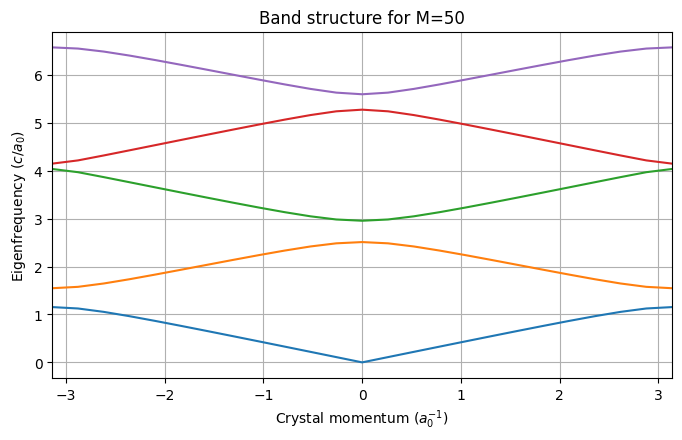

In [24]:
plt.figure(figsize=(8,4.5))
plt.title("Band structure for M="+str(M))
plt.plot(BZ, GFDFD_band_structure)
#plt.ylim([0,5])
plt.grid()
plt.xlim([-b,b])
plt.xlabel("Crystal momentum ($a_0^{-1}$)")
plt.ylabel("Eigenfrequency ($c/a_0$)")
plt.show()

In [227]:
np.save("finite_crystal_convergence_test/GFDFD_band_structure_M"+str(M)+".npy", GFDFD_band_structure)

# Defect

Text(0, 0.5, '$\\epsilon(x)$')

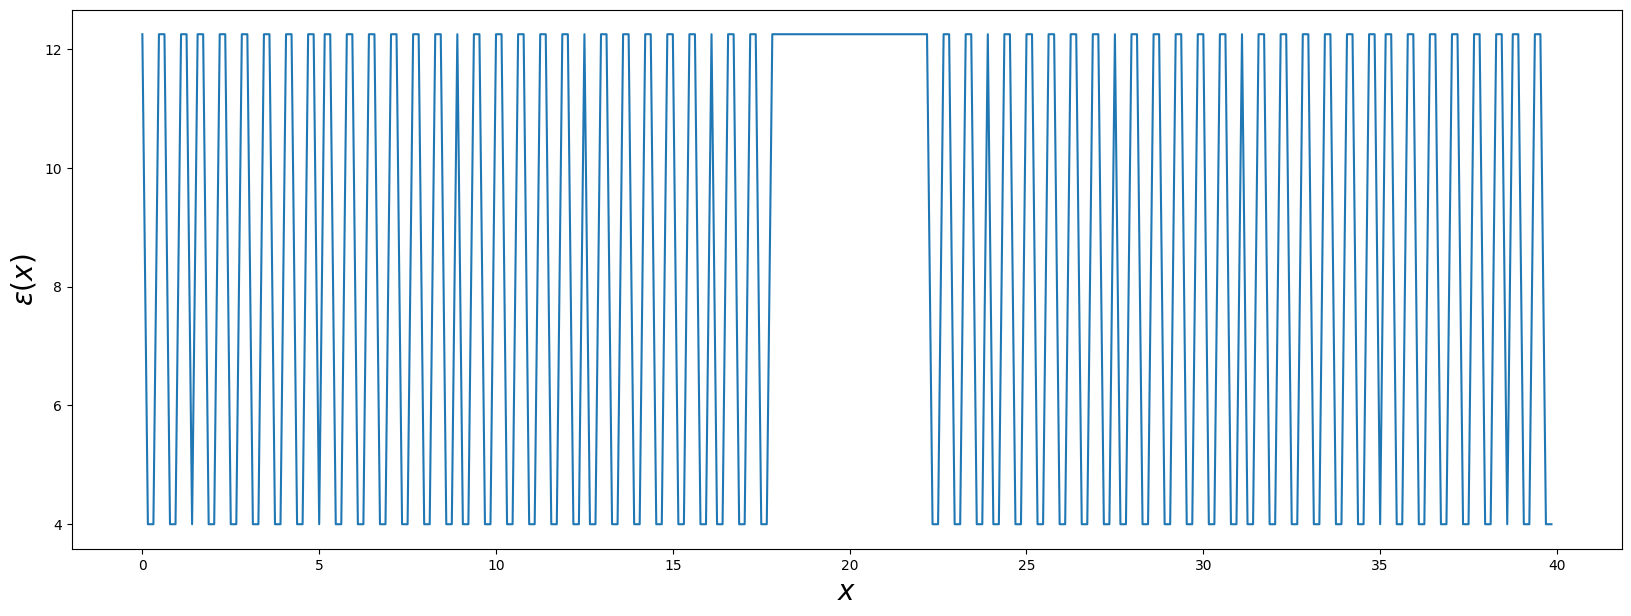

In [80]:
n = 256 # number of sampling points of a single unit cell
M = 1 # times the cell is repeated through all space
N = M*n # total number of sampling points7
L=20 #  half of the total len of the lattic
a0 = 2*L # lattice constant
a = a0*M # lattice constant of the cristal
aa=0.3
dx = a/N # space increment
er2=4  # Dielectric value 2
er1=12.25  # Dielectric value 1
d=3



def periodicf(lid,lfd,f,x):
    if x>=lid and x<=lfd :
        return er1
    if ((x>=lfd and x<=(lfd+2*aa)) or (x<=lid and x>=(lid-2*aa))) :
        return f(x)
    elif x>(lfd+2*aa):
        x_new=x-(2*aa)
        return periodicf(li,lf,f,x_new)
    elif x<(lid-2*aa):
        
        x_new=x+(2*aa)
        return periodicf(li,lf,f,x_new)
    
def squareP(li,lf,x):
    return periodicf(li,lf,square,x)
 
# Non-periodic square wave function defined for a range [-l,l]
def square(x):
    if abs(x)>(lf+aa):
        return er1
    else:
        return er2

li = -1.5*d/2
lf = 1.5*d/2
lon=1
x_cell =np.arange(-L*lon,L*lon,dx) # spatial sampling # sampling points in the unit cell
e_cell = [squareP(li,lf,xi) for xi in x_cell]  #Dielectric function
x_cell =x_cell+L*lon
plt.figure(figsize=(20,7))

plt.subplot(111)
plt.plot(x_cell,e_cell)
plt.xlabel('$x$',size=20)
plt.ylabel(r'$\epsilon(x)$',size=20)


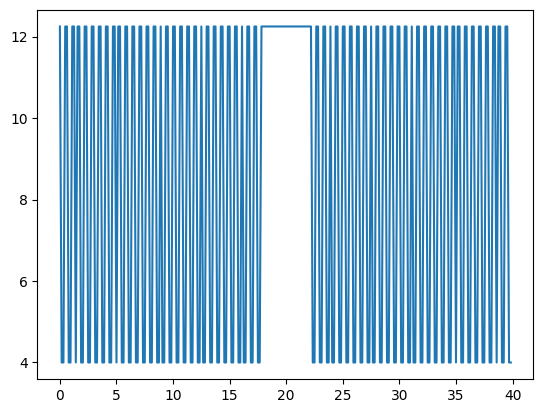

In [81]:
x = np.arange(0, a, dx)
e = np.array(list(e_cell)*M)
plt.figure()
plt.plot(x, e)
plt.show()

In [82]:
D0 = np.diag([-2]*N, 0) + np.diag([1]*(N-1), -1) + np.diag([1]*(N-1), 1)
D0[0,-1] = 1.; D0[-1,0]= 1.
D0 = D0.astype("float")
D0 = D0 @ np.diag(e**-1) * dx**-2
print(D0)

[[ -6.68734694  10.24         0.         ...   0.           0.
   10.24      ]
 [  3.34367347 -20.48        10.24       ...   0.           0.
    0.        ]
 [  0.          10.24       -20.48       ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...  -6.68734694  10.24
    0.        ]
 [  0.           0.           0.         ...   3.34367347 -20.48
   10.24      ]
 [  3.34367347   0.           0.         ...   0.          10.24
  -20.48      ]]


In [83]:
B0 = np.zeros((N,n), dtype='complex')
k = np.pi*a0

for m in range(M):
    B0[m*n:(m+1)*n] = np.identity(n)

print(np.real(B0))

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [84]:
Nk = 25 # Numero de puntos del vector de onda
b = np.pi/a0 # Espacio reciproco.
BZ = np.linspace(-b,b,Nk)
#BZ = [0]
band_structure = []
eigenmodes = []

for k in BZ:
    print(k)
    
    B = np.copy(B0)
    for m in range(M):
        B[m*n:(m+1)*n] *= np.exp(1j*k*a0*m)
        
    Binv = np.linalg.pinv(B) 
    D = np.copy(D0).astype("complex")
    D[0,-1] *= np.exp(-1j*M*k*a0); D[-1, 0] *= np.exp(1j*M*k*a0)
    D = Binv @ D @ B
    
    #eigenfreqs, eigenvecs = eigs(A, which='SR', k = N0)
    eigenfreqs, eigenvecs = np.linalg.eig(D)
    eigenfreqs = np.sqrt(np.abs(np.real(eigenfreqs)))
    inds = eigenfreqs.argsort()
    eigenvecs = eigenvecs[inds]
    eigenfreqs.sort()
    band_structure.append(eigenfreqs)
    eigenmodes.append(eigenvecs)
    
GFDFD_band_structure = np.array(band_structure)[:,:5] # keep the first 5 modes
GFDFD_eigenmodes = np.array(eigenmodes)[:,:5] # keep the first 5 modes

-0.07853981633974483
-0.0719948316447661
-0.06544984694978735
-0.05890486225480862
-0.05235987755982989
-0.04581489286485115
-0.039269908169872414
-0.03272492347489368
-0.026179938779914945
-0.019634954084936207
-0.013089969389957476
-0.006544984694978745
0.0
0.006544984694978731
0.013089969389957462
0.019634954084936207
0.026179938779914938
0.03272492347489367
0.039269908169872414
0.045814892864851145
0.052359877559829876
0.05890486225480862
0.06544984694978734
0.07199483164476608
0.07853981633974483


Text(0, 0.5, 'Eigenfrequency ($c/a_0$)')

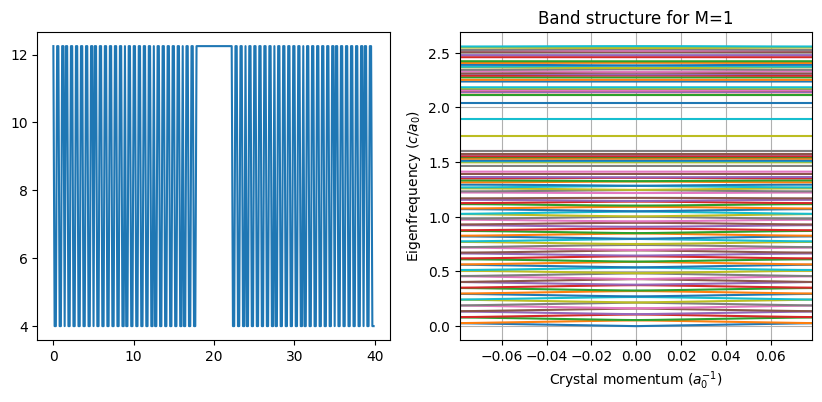

In [90]:
f=plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(x, e)

plt.subplot(122)
GFDFD_band_structure = np.array(band_structure)[:,:100] # keep the first 5 modes
GFDFD_eigenmodes = np.array(eigenmodes)[:,:100] # keep the first 5 modes
plt.title("Band structure for M="+str(M))
plt.plot(BZ, GFDFD_band_structure)
#plt.ylim([0,5])
plt.grid()
plt.xlim([-b,b])
plt.xlabel("Crystal momentum ($a_0^{-1}$)")
plt.ylabel("Eigenfrequency ($c/a_0$)")


n_roll = 2
plt.figure(figsize=(8,4.5))
field = np.convolve(np.abs(GFDFD_eigenmodes[25,2]), np.ones(n_roll)/n_roll, mode='valid')
plt.plot(field)
plt.show()

# PWE Method In $S^1$

In [64]:
lmax = n/2-1
l=np.arange(-lmax,lmax+1) 
N_l = np.shape(l)[0] # total number of plane waves considered in the expansion
G = 2*np.pi*l/a0 # lattice vectors
plane_waves = np.exp(1j*np.outer(G,x_cell))

V0 = simps(np.ones_like(x_cell), x_cell)
kappa = simps(np.conj(plane_waves)*e_cell**-1, x_cell)/V0
KAPPA = np.zeros((N_l,N_l), dtype='complex')
for i in range(N_l):
  for j in range(N_l):
    KAPPA[i,j] = simps( np.exp(-1j*(G[i]-G[j])*x_cell)*e_cell**-1, x_cell)/a0

9.125000000003276
0.9198000000000229


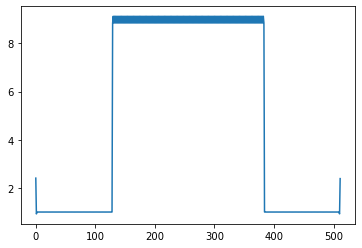

In [65]:
e_approx = np.zeros(n, dtype='complex')
for i in range(2*int(lmax)+1):
  e_approx += kappa[i]*plane_waves[i]

e_approx = e_approx**-1
print(np.max(np.real(e_approx)))
print(np.min(np.real(e_approx)))

plt.plot(np.real(e_approx))
plt.show()

In [66]:
Nk = 25
b = np.pi/a0
BZ = np.linspace(-b,b,Nk)
band_structure = []
eigenmodes = []

for k in BZ:
    print(k)
    
    A = KAPPA @ np.diag(np.abs(k+G)**2)
    
    #eigenfreqs, eigenvecs = eigs(A, which='SR', k = N0)
    eigenfreqs, eigenvecs = np.linalg.eig(A)
    eigenfreqs = np.sqrt(np.abs(np.real(eigenfreqs)))
    inds = eigenfreqs.argsort()
    eigenvecs = eigenvecs[inds]
    eigenfreqs.sort()
    band_structure.append(eigenfreqs)
    eigenmodes.append(eigenvecs)
    
PWE_band_structure = np.array(band_structure)[:,:5] # keep the first 5 modes
PWE_eigenmodes = np.array(eigenmodes)[:,:5] # keep the first 5 modes

-3.141592653589793
-2.8797932657906435
-2.6179938779914944
-2.356194490192345
-2.0943951023931957
-1.8325957145940461
-1.5707963267948966
-1.3089969389957472
-1.0471975511965979
-0.7853981633974483
-0.5235987755982991
-0.2617993877991496
0.0
0.26179938779914913
0.5235987755982987
0.7853981633974478
1.0471975511965974
1.3089969389957465
1.5707963267948966
1.8325957145940457
2.094395102393195
2.356194490192345
2.617993877991494
2.879793265790643
3.141592653589793


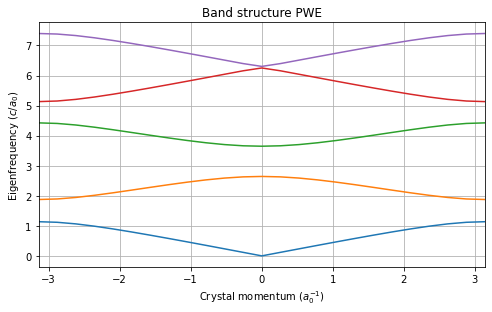

In [67]:
plt.figure(figsize=(8,4.5))
plt.title("Band structure PWE")
plt.plot(BZ, PWE_band_structure)
#plt.ylim([0,5])
plt.grid()
plt.xlim([-b,b])
plt.xlabel("Crystal momentum ($a_0^{-1}$)")
plt.ylabel("Eigenfrequency ($c/a_0$)")
plt.show()

In [68]:
np.save("finite_crystal_convergence_test/PWE_band_structure.npy", PWE_band_structure)

In [4]:
import sympy

# Define the j1, m1, j2, m2 values
j1 = 1
m1 = 0
j2 = 1
m2 = 1

# Calculate the range of m values
m_values = range(-j1, j1+1)

# Create a dictionary to store the Clebsch-Gordan coefficients
cg_coeffs = {}

# Loop over each possible value of m
for m in m_values:
    # Calculate the Clebsch-Gordan coefficient for this m value
    cg = sympy.Rational(1, sympy.sqrt(2*j2+1)) * sympy.Wigner3j(j1, j2, 1, m1, m2, -m)
    
    # Store the coefficient in the dictionary
    cg_coeffs[m] = cg

# Print the dictionary of Clebsch-Gordan coefficients
print(cg_coeffs)


TypeError: invalid input: sqrt(3)

In [7]:
sympy.Rational(1, sympy.sqrt(2*j2+1))

TypeError: invalid input: sqrt(3)